# Boxplot with best features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from RashomonSetAnalyser import RashomonSetAnalyser

In [3]:
rashomon = RashomonSetAnalyser()
rashomon.pdp_measures = pd.read_csv('abs_sum.csv')
rashomon.rashomon_search_results = pd.read_csv('results.csv')

In [4]:
q = pd.DataFrame({
    'colname' : rashomon.pdp_measures.colname,
    'diff1' : (rashomon.pdp_measures.max(axis = 1) - rashomon.pdp_measures.min(axis = 1)).rank(),
    'diff2' : (rashomon.pdp_measures.max(axis = 1) - rashomon.pdp_measures.min(axis = 1)).rank(ascending = False),
    'diff' : rashomon.pdp_measures.max(axis = 1) - rashomon.pdp_measures.min(axis = 1)})
c = q.loc[(q.diff1 <= 10) | (q.diff2 <= 10)].sort_values(by = 'diff', ascending = False).colname.to_list()

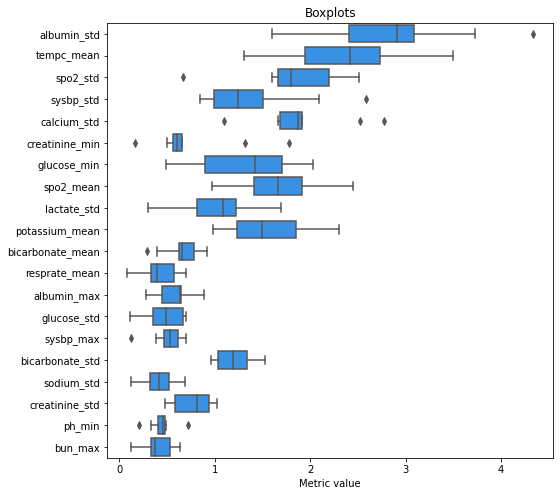

In [5]:
figsize = (8, 8)        
model_names = rashomon.pdp_measures.columns.tolist()[1:]

#############
features = c
#############

xlabels = True

# labels = rashomon.pdp_measures[rashomon.pdp_measures['colname'].isin(features)].colname.tolist()
labels = c
            
tdf = rashomon.pdp_measures[rashomon.pdp_measures['colname'].isin(features)][model_names + ['colname']].set_index('colname').T
tdf = tdf[c]
        
fig, ax = plt.subplots(figsize = figsize)
sns.boxplot(data = tdf, color = 'dodgerblue', orient='h')
plt.title("Boxplots")
ax.set_yticklabels(labels)
ax.set_ylabel('')    
ax.set_xlabel('Metric value')

plt.show()